In [2]:
import numpy as np
import poincarepy.potentials as pot
from poincarepy import PoincareMapper
import matplotlib.pyplot as plt

# Potential Dynamics
Let's go back to the logarithmic potential seen in the previous notebook, and consider the slice $y=0$:

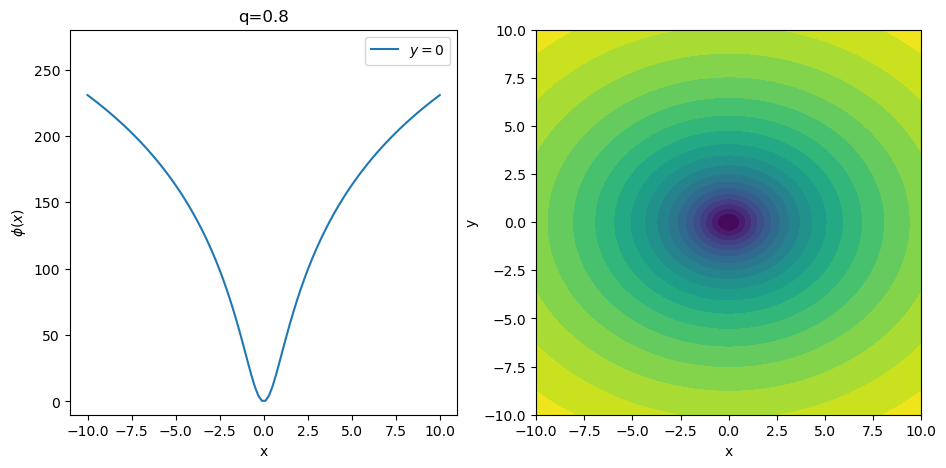

In [3]:
logpot1 = pot.LogarithmicPotential(v0=10.,rc=1.,q=0.8)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,5))

lim = 10
# q = 0.8
logpot1.plot_x(-lim,lim,y=0,label='$y=0$',ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('$\phi(x)$')
ax1.legend()
ax1.set_title('q=0.8')
ax1.set_ylim(-10,280)

im = logpot1.plotcontour(-lim,lim,-lim,lim,ax=ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_aspect('equal')
#plt.colorbar(im,ax=ax2,label='$\phi(x,y)$')

## Integrating Orbits
In poincarepy, once a potential has been defined, the computations are performed using the `PoincareMapper` class. To start, we can pick a point in the 4D phase space $\{x_0,y_0,\dot{x}_0,\dot{y}_0\}$ of the system and perform time integration to visualize an orbit.

In [4]:
# Create a PoincareMapper object from the potential. This class has some additional parameters, but here the defaults are fine
mapper = PoincareMapper(logpot1)

# Choose a starting point
r0 = [1,0,0,5] # [x,y,vx,vy]

# Compute orbit energy
E_orb = logpot1.phi(r0) + 0.5*(r0[2]**2 + r0[3]**2)
print(f"Energy of orbit: {E_orb:.2f}")

# Integrate until t=10 (arbitrary time units)
orb = mapper.integrate_orbit_full(r0,10)

Energy of orbit: 47.16


We can then plot the orbit in configuration space $\{x,y\}$

Text(0.5, 1.0, '$E=47.16$')

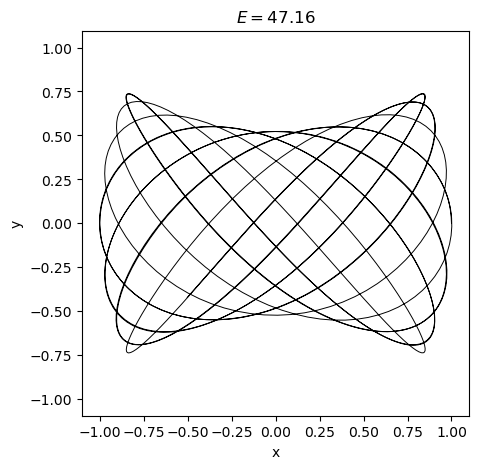

In [5]:
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.axis('equal')
ax1.plot(orb[0],orb[1],color='black',lw=0.7)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(f"$E={E_orb:.2f}$")

**Suggestion:** Try to see how the same orbit looks like when you add rotation to the potential (see previous notebook)

## Zero-velocity curve
In general, only part of the phase space is accessible to **bound orbits**. This is because any bound orbit has to satisfy
$$ \phi_{min} \leq E \leq \phi_{max}$$
where $E$ is the total energy of the orbit, which is conserved in time,
$$E = U + K = \phi(x,y) + \frac{1}{2}(\dot{x}^2 + \dot{y}^2).$$
In the case of the logarithmic potential, $\phi_{max} = +\infty$ and $\phi_{min} = v_c^2\log{r_c}$.

Consider the slice $y=0$ and fix the orbit energy $E$. Of the 3 remaining variables $\{x,\dot{x},\dot{y}\}$, one can be eliminated through the conservation of the energy,
$$ \dot{y} = \sqrt{2(E-\phi(x,y)) - \dot{x}^2}.$$
The dynamics can then be studied in the reduced phase space $S = \{x,\dot{x}\}$. As was explained in the lecture, the line that encloses the region of $S$ accessible to bound orbits given an energy $E$ is called the **zero-velocity curve**. Its defined as the points $(x_v,\dot{x}_v)$ such that $\dot{y} = 0$ and so
$$ E = \phi(x,0) + \frac{1}{2}\dot{x}^2 $$
The x-axis limits of this curve can be found by setting $\dot{x} = 0$, and solving $E = \phi(x,0)$. While this can be done analytically in most cases, poincarepy provides a method to do it numerically, provided a rough estimate is given.

[-1.25221836  1.25221836]


(-10.0, 280.0)

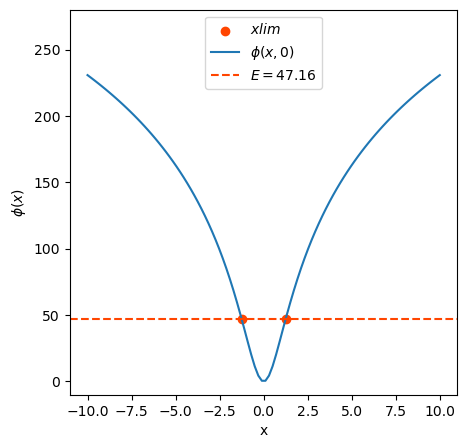

In [6]:
# We keep E equal to the energy of the orbit shown above.
# The first plot of the notebook suggests that at this energy, the x limits should be within [-5,5]
xlim = mapper.xlim(E_orb,xdot=0,a=-5,b=5)
print(xlim)

# Visualize
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.scatter(xlim,(E_orb,E_orb),c='orangered',label="$xlim$")
logpot1.plot_x(-lim,lim,y=0,label='$\phi(x,0)$',ax=ax1)
ax1.axhline(E_orb,color='orangered',ls='--',label=f"$E={E_orb:.2f}$")
ax1.set_xlabel('x')
ax1.set_ylabel('$\phi(x)$')
ax1.legend()
ax1.set_ylim(-10,280)

The full zero velocity curve can then be found by computing $\dot{x}$ for $x$ in xlim,
$$\dot{x} = \pm\sqrt{2(E-\phi(x,0))}$$

In [7]:
X = np.linspace(xlim[0],xlim[1],400)
Xdot = mapper.zvc(E_orb,X)

# Since there is a +/- sign
zvc = np.array([np.hstack((X,X[::-1])),np.hstack((Xdot,-Xdot[::-1]))])

Text(0.5, 1.0, 'Zero-Velocity Curve, $E=47.16$, $y=0$')

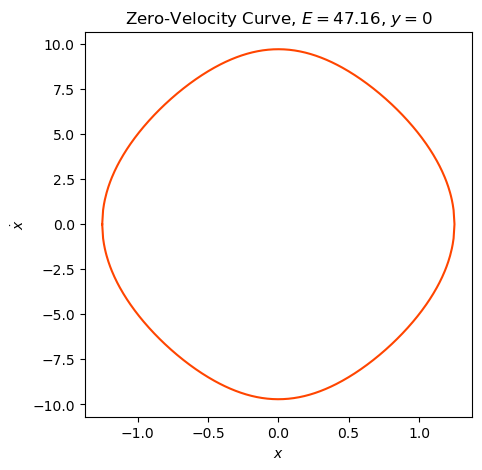

In [8]:
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.plot(zvc[0],zvc[1],color='orangered')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\dot{x}$')
ax1.set_title(f"Zero-Velocity Curve, $E={E_orb:.2f}$, $y=0$")

Performing the same steps for multiple energies gives a nice picture of how the allowed region of $S$ changes with energy.

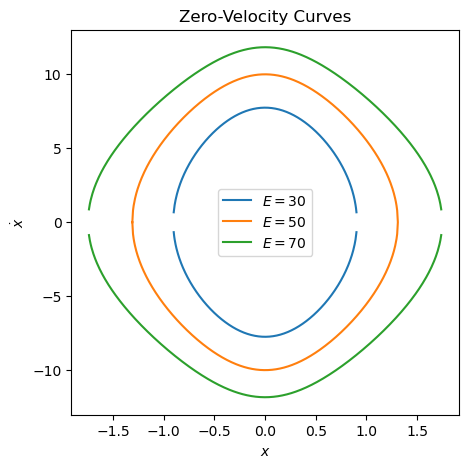

In [10]:
energies = np.array([30,50,70])
zvcs = []
for E in energies:
    xlim = mapper.xlim(E,xdot=0,a=-10,b=10)
    X = np.linspace(xlim[0],xlim[1],400)
    Xdot = mapper.zvc(E,X)
    zvc = np.array([np.hstack((X,X[::-1])),np.hstack((Xdot,-Xdot[::-1]))])
    zvcs.append(zvc)

fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
for k,E in enumerate(energies):
    ax1.plot(zvcs[k][0],zvcs[k][1],label=f"$E={E:n}$")
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\dot{x}$')
ax1.set_title(f"Zero-Velocity Curves")
ax1.legend()

The spaces around the $\dot{x}=0$ axis are a purely numerical artifact.